In [1]:
import numpy as np

In [7]:
class wer_score:
  def __init__(self):
    pass

  def fit(self, text1, text2):
    self.text1 = text1
    self.text2 = text2
    self.backtrace = [[None for i in range(0, len(self.text2) + 1)]for i in range(0 , len(self.text1) + 1)]
    self.cost = np.zeros((len(self.text1) + 1, len(self.text2) + 1))

    self.cost[0] = [i for i in range(0, len(self.text2) + 1)]
    self.backtrace[0][ : ] = "del"

    self.cost[: , 0] = [i for i in range(0, len(self.text1) + 1)]
    self.backtrace[ : ][0] = "ins"

    for row in range(1 , len(self.text1) + 1):
      for col in range(1, len(self.text2) + 1):
        if self.text1[row - 1] == self.text2[col - 1]:
          self.cost[row][col] = self.cost[row - 1][col - 1]
          self.backtrace[row][col] = "same"
        else:
          delete = self.cost[row - 1][col] + 1
          insert = self.cost[row][col - 1] + 1
          substitution = self.cost[row - 1][col - 1] + 1
          self.cost[row][col] = min(delete , insert, substitution)

          if self.cost[row][col] == delete:
            self.backtrace[row][col] = "del"

          elif self.cost[row][col] == insert:
            self.backtrace[row][col] = "ins"

          elif self.cost[row][col] == substitution:
            self.backtrace[row][col] = "sub"

    self.num_del , self.num_ins , self.num_sub, self.num_same = 0, 0, 0, 0
    i, j = len(self.text1) , len(self.text2)

    while i > 0 or j > 0:
      if self.backtrace[i][j] == "same":
        self.num_same += 1
        i -= 1
        j -= 1

      elif self.backtrace[i][j] == "sub":
        self.num_sub += 1
        i -= 1
        j -= 1

      elif self.backtrace[i][j] == "del":
        self.num_del += 1
        i -= 1

      if self.backtrace[i][j] == "ins":
        self.num_ins += 1
        j -= 1

    return (self.num_ins + self.num_del + self.num_sub) / len(self.text2)

  def get_parameter(self):
    return {
        "number of insert" : self.num_ins,
        "number of delete" : self.num_del,
        "number of substitution" : self.num_sub
    }

In [14]:
model = wer_score()
model.fit("kitten", "sitting")

0.42857142857142855

In [15]:
model.get_parameter()

{'number of insert': 1, 'number of delete': 0, 'number of substitution': 2}

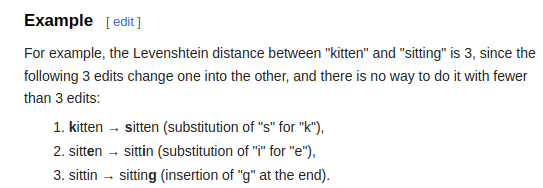

this pic for wikipedia and for visit this website [click on](https://en.wikipedia.org/wiki/Levenshtein_distance)


for any question : parvvaresh@gmail.com